In [1]:
# !pip install matplotlib

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from PIL import Image
# import cv2
# from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical

# Scikit Learn Libraries
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

# Classification Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix

In [2]:
import tensorflow as tf
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))

Num of GPUs available:  13


In [3]:
# checks to see if GPU is present
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [4]:
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))

Num of GPUs available:  13


# Import Train and Validation Set

In [2]:
def pickle_to_set(setName):
    with open(setName,'rb') as f:
        set = pickle.load(f)
    print("dataset has been imported :)")
    return set

In [3]:
train_x = pickle_to_set('./train_resamp_x.pkl')
train_y = pickle_to_set('./train_resamp_y.pkl')

val_x = pickle_to_set('./val_resamp_x.pkl')
val_y = pickle_to_set('./val_resamp_y.pkl')

dataset has been imported :)
dataset has been imported :)
dataset has been imported :)
dataset has been imported :)


In [7]:
print(f"No. of train_x: {len(train_x)}")
print(f"No. of train_y: {len(train_y)}")
print(f"No. of val_x: {len(val_x)}")
print(f"No. of val_y: {len(val_y)}")

No. of train_x: 934
No. of train_y: 934
No. of val_x: 234
No. of val_y: 234


In [8]:
print(f"shape of train_x: {train_x.shape}")
print(f"shape of train_y: {train_y.shape}")
print(f"shape of val_x: {val_x.shape}")
print(f"shape of val_y: {val_y.shape}")

shape of train_x: (934, 32, 32, 3)
shape of train_y: (934,)
shape of val_x: (234, 32, 32, 3)
shape of val_y: (234,)


# Train Model

In [11]:
# declare a sequential model object to build layers
model = Sequential()

# 1st Cov layer with an output shape of 28x28x16, ReLu activation function for more robust feature map
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
# Max pooling layer with a size of 2x2 to resulting in a smaller, more informative feature map
model.add(MaxPool2D(pool_size=(2,2)))
# Regularisation set to 0.25 that sets 25% if input set randomly to zero during each training cycle
model.add(Dropout(rate=0.25))

# 2nd Cov layer with an ouput shape of 12x12x32, ReLu activation function for more robust feature map. Kernel size reduced to 3x3
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# Max pooling layer with a size of 2x2 to resulting in a smaller, more informative feature map
model.add(MaxPool2D(pool_size=(2,2)))
# Regularisation set to 0.25 that sets 25% if input set randomly to zero during each training cycle
model.add(Dropout(rate=0.25))

# 3nd Cov layer with an output shape of 4x4x64, ReLu activation function for more robust feature map. Kernel size reduced to 3x3
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Max pooling layer with a size of 2x2 to resulting in a smaller, more informative feature map
model.add(MaxPool2D(pool_size=(2,2)))
# Regularisation set to 0.25 that sets 25% if input set randomly to zero during each training cycle
model.add(Dropout(rate=0.25))

# Converts 3D tensor output into a 1D tensor to be fed inti the fully connected layer
model.add(Flatten())
# Final layer that connects previous neurons together,
model.add(Dense(128, activation='relu'))
# Output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Display summary of all layers combined
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)         

In [14]:
# Compile model 
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/10
30/30 [==============================] - 5s 19ms/step - loss: 0.6836 - accuracy: 0.5621 - val_loss: 0.6849 - val_accuracy: 0.5598
Epoch 2/10
30/30 [==============================] - 0s 7ms/step - loss: 0.6804 - accuracy: 0.5610 - val_loss: 0.6879 - val_accuracy: 0.5214
Epoch 3/10
30/30 [==============================] - 0s 7ms/step - loss: 0.6723 - accuracy: 0.5696 - val_loss: 0.6740 - val_accuracy: 0.5684
Epoch 4/10
30/30 [==============================] - 0s 7ms/step - loss: 0.6702 - accuracy: 0.5985 - val_loss: 0.6693 - val_accuracy: 0.6154
Epoch 5/10
30/30 [==============================] - 0s 7ms/step - loss: 0.6419 - accuracy: 0.6199 - val_loss: 0.6505 - val_accuracy: 0.6453
Epoch 6/10
30/30 [==============================] - 0s 7ms/step - loss: 0.6506 - accuracy: 0.6199 - val_loss: 0.6646 - val_accuracy: 0.6410
Epoch 7/10
30/30 [==============================] - 0s 7ms/step - loss: 0.6528 - accuracy: 0.6381 - val_loss: 0.6688 - val_accuracy: 0.5684
Epoch 8/10
30/30 [=

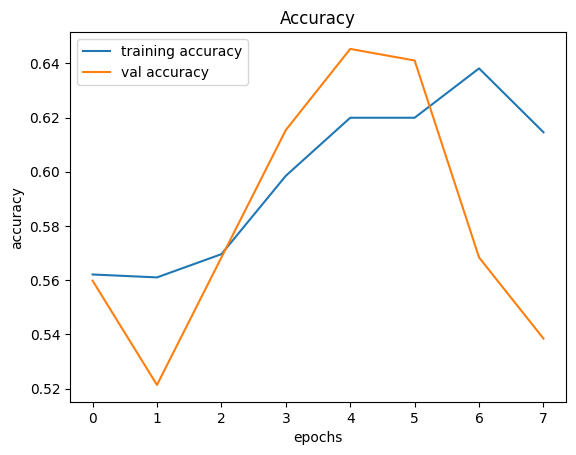

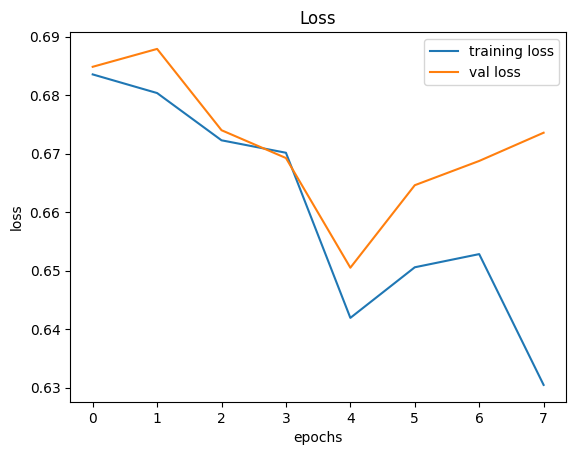

In [11]:
# Declare training parameters
epoch = 10
batch_size =32

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train Model
history = model.fit(train_x, train_y, batch_size= batch_size, callbacks=[callback], epochs=epoch,
               validation_data= (val_x, val_y))

# Display Accuracy and Loss values of Training and Validation data

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

Epoch 1/30
30/30 [==============================] - 1s 16ms/step - loss: 0.6923 - accuracy: 0.5332 - val_loss: 0.6891 - val_accuracy: 0.5427
Epoch 2/30
30/30 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.5482 - val_loss: 0.6815 - val_accuracy: 0.5513
Epoch 3/30
30/30 [==============================] - 0s 6ms/step - loss: 0.6645 - accuracy: 0.5953 - val_loss: 0.6687 - val_accuracy: 0.5812
Epoch 4/30
30/30 [==============================] - 0s 6ms/step - loss: 0.6562 - accuracy: 0.6231 - val_loss: 0.6546 - val_accuracy: 0.6282
Epoch 5/30
30/30 [==============================] - 0s 6ms/step - loss: 0.6580 - accuracy: 0.6081 - val_loss: 0.6704 - val_accuracy: 0.5812
Epoch 6/30
30/30 [==============================] - 0s 6ms/step - loss: 0.6414 - accuracy: 0.6253 - val_loss: 0.6629 - val_accuracy: 0.5855
Epoch 7/30
30/30 [==============================] - 0s 6ms/step - loss: 0.6322 - accuracy: 0.6263 - val_loss: 0.6649 - val_accuracy: 0.5855
Epoch 8/30
30/30 [=

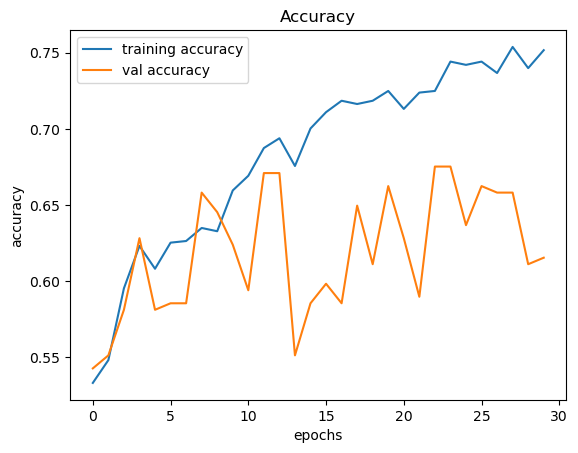

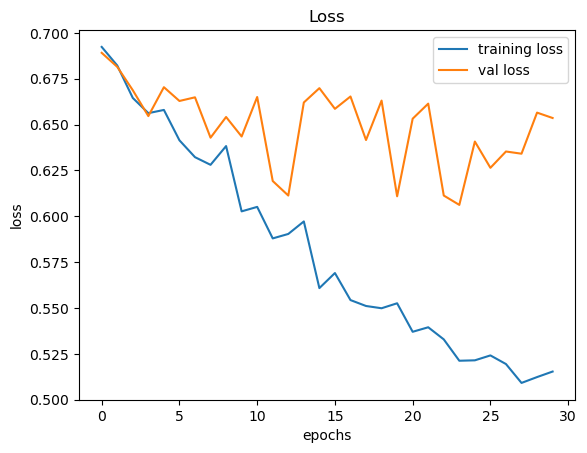

In [14]:
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.callbacks import LearningRateScheduler

# Declare training parameters
epoch = 30
batch_size =32

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# define the callback function
# lr_callback = LambdaCallback(on_epoch_begin=lambda epoch,logs: print("Learning rate:", model.optimizer.lr.numpy()))

# Train Model
history = model.fit(train_x, train_y, batch_size= batch_size, callbacks=[callback], epochs=epoch,
               validation_data= (val_x, val_y))

print("Learning rate:", model.optimizer.lr.numpy())

# Display Accuracy and Loss values of Training and Validation data
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [12]:
model.save("CNN_new.h5")

# Adding Data Augmentation Layers

In [19]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical",input_shape = (32, 32, 3)),
  layers.RandomRotation(0.2),
  layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
  layers.RandomZoom(0.3),
#   layers.RandomBrightness([-0.8,0.8]),
  layers.RandomContrast(0.2)
])

data_augmentation_layer = tf.keras.Sequential([                                    
  tf.keras.layers.RandomFlip('horizontal',
         input_shape=(224, 224, 3)),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomWidth(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomContrast(0.2)                                  
], name='data_augmentation')




In [20]:
from keras.layers import Input

# input_shape = (32, 32, 1)
# inputs = Input(shape=input_shape)

model_aug = Sequential([
    
  data_augmentation,
    
  layers.Conv2D(16, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),
  
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),
    
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.2),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid', name="outputs")
])

model_aug.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Display summary of all layers combined

model_aug.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 32)         

Epoch 1/10
30/30 [==============================] - 2s 21ms/step - loss: 0.6982 - accuracy: 0.5150 - val_loss: 0.6928 - val_accuracy: 0.5171
Epoch 2/10
30/30 [==============================] - 0s 11ms/step - loss: 0.6855 - accuracy: 0.5225 - val_loss: 0.6932 - val_accuracy: 0.5214
Epoch 3/10
30/30 [==============================] - 0s 11ms/step - loss: 0.6850 - accuracy: 0.5428 - val_loss: 0.6884 - val_accuracy: 0.5214
Epoch 4/10
30/30 [==============================] - 0s 11ms/step - loss: 0.6855 - accuracy: 0.5353 - val_loss: 0.6887 - val_accuracy: 0.5214
Epoch 5/10
30/30 [==============================] - 0s 12ms/step - loss: 0.6702 - accuracy: 0.5493 - val_loss: 0.6844 - val_accuracy: 0.5769
Epoch 6/10
30/30 [==============================] - 0s 12ms/step - loss: 0.6487 - accuracy: 0.6221 - val_loss: 0.6498 - val_accuracy: 0.6624
Epoch 7/10
30/30 [==============================] - 0s 12ms/step - loss: 0.6336 - accuracy: 0.6488 - val_loss: 0.6598 - val_accuracy: 0.5940
Epoch 8/10
30

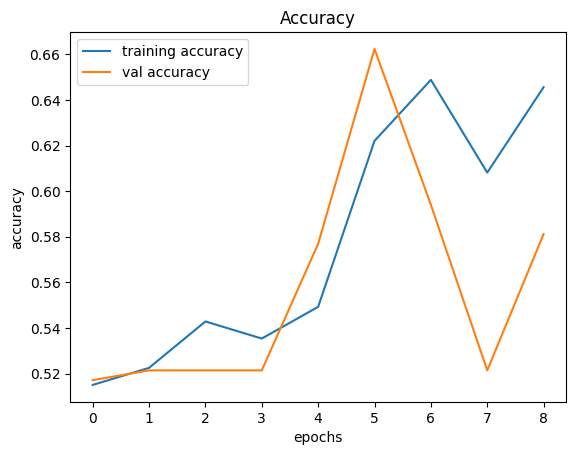

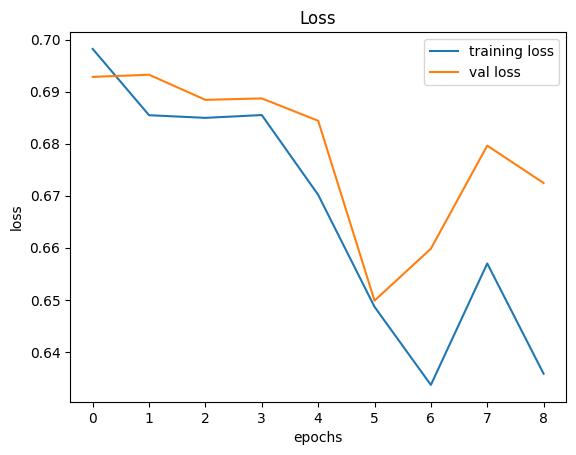

In [21]:
# Declare training parameters
learning_rate = 0.001
epoch = 10
batch_size =32

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Train Model
history = model_aug.fit(train_x, train_y, batch_size= batch_size, callbacks=[callback], epochs=epoch,
               validation_data= (val_x, val_y))

# Display Accuracy and Loss values of Training and Validation data

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [26]:
model_aug.save("CNN_new_aug.h5")

# Using ImageDataGenerator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define the augmentation parameters
train_data_gen = ImageDataGenerator(
    rotation_range=20,   # randomly rotate images by up to 20 degrees
    width_shift_range=0.1,   # randomly shift images horizontally by up to 10%
    height_shift_range=0.1,  # randomly shift images vertically by up to 10%
    zoom_range=0.1,  # randomly zoom in by up to 10%
    horizontal_flip=True,   # randomly flip images horizontally
    vertical_flip=False,    # don't flip images vertically
    fill_mode='nearest'     # fill any empty pixels with the nearest neighbor
)

# fit the generator to the data
train_data_gen.fit(train_x)

# use the generator to generate augmented data
train_data = train_data_gen.flow(train_x, train_y, batch_size=32)


In [4]:
# define the augmentation parameters
val_data_gen = ImageDataGenerator(
    rotation_range=20,   # randomly rotate images by up to 20 degrees
    width_shift_range=0.1,   # randomly shift images horizontally by up to 10%
    height_shift_range=0.1,  # randomly shift images vertically by up to 10%
    zoom_range=0.1,  # randomly zoom in by up to 10%
    horizontal_flip=True,   # randomly flip images horizontally
    vertical_flip=False,    # don't flip images vertically
    fill_mode='nearest'     # fill any empty pixels with the nearest neighbor
)

# fit the generator to the data
val_data_gen.fit(val_x)

# use the generator to generate augmented data
val_data = val_data_gen.flow(val_x, val_y, batch_size=32)


In [5]:
from keras.layers import Input
from tensorflow.keras import layers

model_img_aug = Sequential([
    
    
  layers.Conv2D(16, 5, padding='same', activation='relu', input_shape=(32,32,3)),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),
  
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),
    
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.2),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid', name="outputs")
])

model_img_aug.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Display summary of all layers combined

model_img_aug.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          1

Epoch 1/25
30/30 [==============================] - 1s 22ms/step - loss: 0.7002 - accuracy: 0.5332 - val_loss: 0.6907 - val_accuracy: 0.5214
Epoch 2/25
30/30 [==============================] - 0s 14ms/step - loss: 0.6858 - accuracy: 0.5546 - val_loss: 0.6840 - val_accuracy: 0.6538
Epoch 3/25
30/30 [==============================] - 0s 15ms/step - loss: 0.6721 - accuracy: 0.5867 - val_loss: 0.6881 - val_accuracy: 0.5214
Epoch 4/25
30/30 [==============================] - 0s 14ms/step - loss: 0.6854 - accuracy: 0.5578 - val_loss: 0.6906 - val_accuracy: 0.5214
Epoch 5/25
30/30 [==============================] - 0s 16ms/step - loss: 0.6637 - accuracy: 0.5942 - val_loss: 0.6694 - val_accuracy: 0.6154
Epoch 6/25
30/30 [==============================] - 0s 14ms/step - loss: 0.6386 - accuracy: 0.6178 - val_loss: 0.6542 - val_accuracy: 0.6368
Epoch 7/25
30/30 [==============================] - 0s 14ms/step - loss: 0.6262 - accuracy: 0.6488 - val_loss: 0.6502 - val_accuracy: 0.6453
Epoch 8/25
30

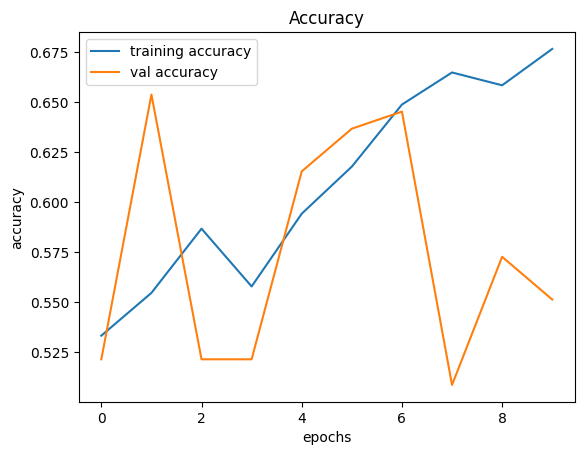

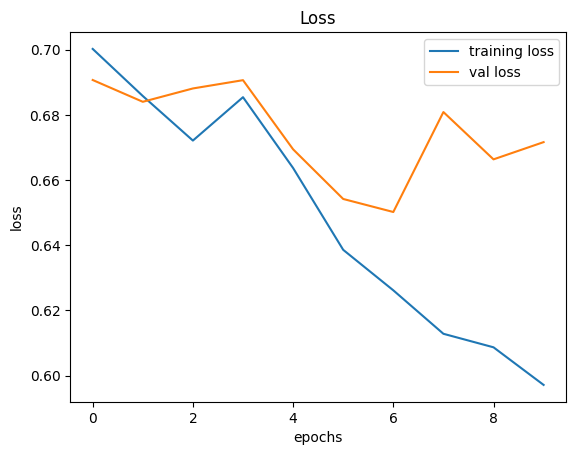

In [29]:
# Declare training parameters
learning_rate = 0.01
epoch = 25
batch_size =32

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Train Model
history = model_img_aug.fit(train_x, train_y, batch_size= batch_size, callbacks=[callback], epochs=epoch,
               validation_data= val_data)

# Display Accuracy and Loss values of Training and Validation data

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

Epoch 1/30
30/30 [==============================] - 1s 23ms/step - loss: 0.7022 - accuracy: 0.5364 - val_loss: 0.6891 - val_accuracy: 0.5385
Epoch 2/30
30/30 [==============================] - 1s 19ms/step - loss: 0.6854 - accuracy: 0.5396 - val_loss: 0.6861 - val_accuracy: 0.5342
Epoch 3/30
30/30 [==============================] - 1s 19ms/step - loss: 0.6822 - accuracy: 0.5503 - val_loss: 0.6825 - val_accuracy: 0.5897
Epoch 4/30
30/30 [==============================] - 1s 19ms/step - loss: 0.6601 - accuracy: 0.6081 - val_loss: 0.6599 - val_accuracy: 0.6453
Epoch 5/30
30/30 [==============================] - 1s 19ms/step - loss: 0.6691 - accuracy: 0.6167 - val_loss: 0.6819 - val_accuracy: 0.5171
Epoch 6/30
30/30 [==============================] - 1s 18ms/step - loss: 0.6400 - accuracy: 0.6370 - val_loss: 0.6696 - val_accuracy: 0.5598
Epoch 7/30
30/30 [==============================] - 1s 18ms/step - loss: 0.6310 - accuracy: 0.6392 - val_loss: 0.6542 - val_accuracy: 0.6538
Epoch 8/30
30

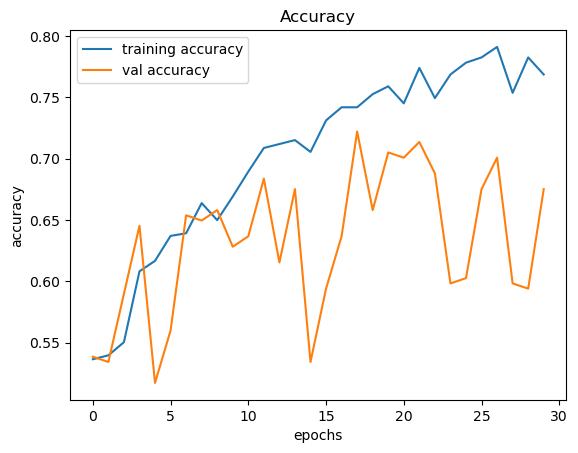

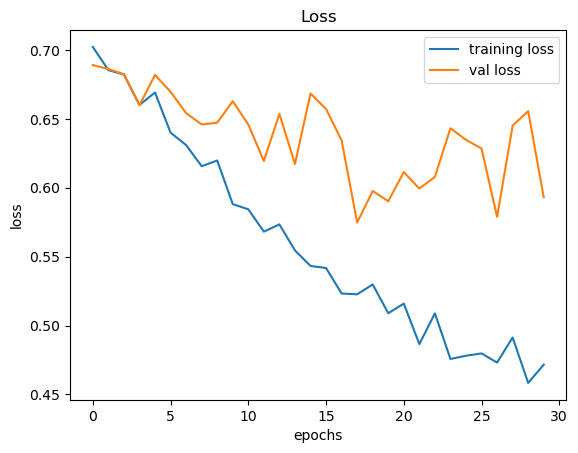

In [6]:
## More epochs

# Declare training parameters
epoch = 30
batch_size =32

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Train Model
history = model_img_aug.fit(train_x, train_y, batch_size= batch_size, callbacks=[callback], epochs=epoch,
               validation_data= val_data)

# Display Accuracy and Loss values of Training and Validation data

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [30]:
# Save model
model.save("CNN_new_img_gen.h5")

# CNN with Additional Dataset and Augmentation

In [8]:
def pickle_to_set(setName):
    with open(setName,'rb') as f:
        set = pickle.load(f)
    print("dataset has been imported :)")
    return set

In [9]:
train_x = pickle_to_set('./train_x_concat.pkl')
train_y = pickle_to_set('./train_y_concat.pkl')

val_x = pickle_to_set('./val_split_x_v2.pkl')
val_y = pickle_to_set('./val_split_y_v2.pkl')

dataset has been imported :)
dataset has been imported :)
dataset has been imported :)
dataset has been imported :)


In [10]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

(51831, 32, 32, 3)
(51831,)
(6626, 32, 32, 3)
(6626,)


## Create Augmentation Generators

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define the augmentation parameters
train_data_gen = ImageDataGenerator(
    rotation_range=20,   # randomly rotate images by up to 20 degrees
    width_shift_range=0.1,   # randomly shift images horizontally by up to 10%
    height_shift_range=0.1,  # randomly shift images vertically by up to 10%
    zoom_range=0.2,  # randomly zoom in by up to 20%
    horizontal_flip=True,   # randomly flip images horizontally
    vertical_flip=False,    # don't flip images vertically
    fill_mode='nearest'     # fill any empty pixels with the nearest neighbor
)

# fit the generator to the data
train_data_gen.fit(train_x)

# use the generator to generate augmented data
train_data = train_data_gen.flow(train_x, train_y, batch_size=32)



In [21]:
# define the augmentation parameters
val_data_gen = ImageDataGenerator(
    rotation_range=40,   # randomly rotate images by up to 40 degrees
    width_shift_range=0.2,   # randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  # randomly shift images vertically by up to 20%
    zoom_range=0.1,  # randomly zoom in by up to 10%
    horizontal_flip=True,   # randomly flip images horizontally
    vertical_flip=False,    # don't flip images vertically
    fill_mode='nearest'     # fill any empty pixels with the nearest neighbor
)

# fit the generator to the data
val_data_gen.fit(val_x)

# use the generator to generate augmented data
val_data = val_data_gen.flow(val_x, val_y, batch_size=32)


In [25]:
# declare a sequential model object to build layers
model = Sequential()

# 1st Cov layer with an output shape of 28x28x16, ReLu activation function for more robust feature map
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
# Max pooling layer with a size of 2x2 to resulting in a smaller, more informative feature map
model.add(MaxPool2D(pool_size=(2,2)))
# Regularisation set to 0.25 that sets 25% if input set randomly to zero during each training cycle
model.add(Dropout(rate=0.25))

# 2nd Cov layer with an ouput shape of 12x12x32, ReLu activation function for more robust feature map. Kernel size reduced to 3x3
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# Max pooling layer with a size of 2x2 to resulting in a smaller, more informative feature map
model.add(MaxPool2D(pool_size=(2,2)))
# Regularisation set to 0.25 that sets 25% if input set randomly to zero during each training cycle
model.add(Dropout(rate=0.25))

# 3nd Cov layer with an output shape of 4x4x64, ReLu activation function for more robust feature map. Kernel size reduced to 3x3
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Max pooling layer with a size of 2x2 to resulting in a smaller, more informative feature map
model.add(MaxPool2D(pool_size=(2,2)))
# Regularisation set to 0.25 that sets 25% if input set randomly to zero during each training cycle
model.add(Dropout(rate=0.25))

# Converts 3D tensor output into a 1D tensor to be fed inti the fully connected layer
model.add(Flatten())
# Final layer that connects previous neurons together,
model.add(Dense(128, activation='relu'))
# Output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Display summary of all layers combined
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 64)         

In [26]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/50
30/30 [==============================] - 1s 13ms/step - loss: 0.7011 - accuracy: 0.4861 - val_loss: 0.6908 - val_accuracy: 0.4872
Epoch 2/50
30/30 [==============================] - 0s 9ms/step - loss: 0.6775 - accuracy: 0.5557 - val_loss: 0.6868 - val_accuracy: 0.5513
Epoch 3/50
30/30 [==============================] - 0s 9ms/step - loss: 0.6847 - accuracy: 0.5824 - val_loss: 0.6811 - val_accuracy: 0.5940
Epoch 4/50
30/30 [==============================] - 0s 9ms/step - loss: 0.6634 - accuracy: 0.5985 - val_loss: 0.6767 - val_accuracy: 0.5470
Epoch 5/50
30/30 [==============================] - 0s 9ms/step - loss: 0.6551 - accuracy: 0.6167 - val_loss: 0.6689 - val_accuracy: 0.5983
Epoch 6/50
30/30 [==============================] - 0s 9ms/step - loss: 0.6309 - accuracy: 0.6392 - val_loss: 0.6404 - val_accuracy: 0.6538
Epoch 7/50
30/30 [==============================] - 0s 9ms/step - loss: 0.6507 - accuracy: 0.6146 - val_loss: 0.6794 - val_accuracy: 0.5427
Epoch 8/50
30/30 [=

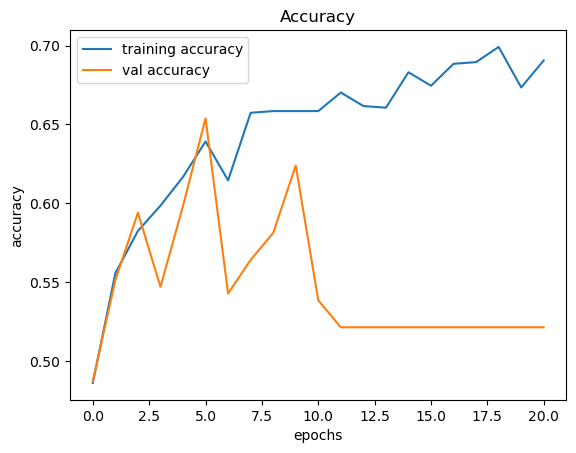

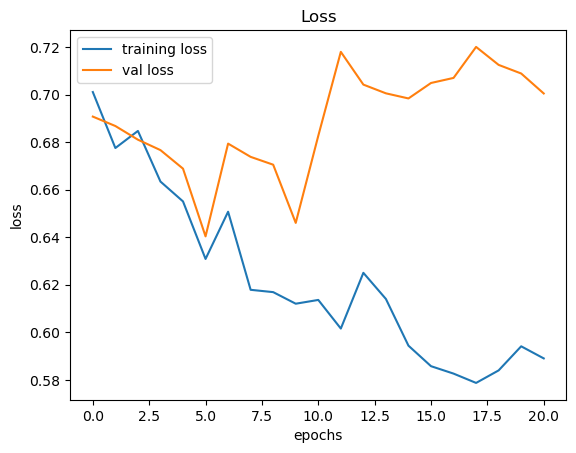

In [27]:
# Declare training parameters
learning_rate = 0.001
epoch = 50
batch_size =32

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Train Model
history = model.fit(train_x, train_y, batch_size= batch_size, callbacks=[callback], epochs=epoch,
               validation_data= val_data)

# Display Accuracy and Loss values of Training and Validation data

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [17]:
# Save model
model.save("CNN_concat_aug.h5")

# Hyperparameter Tuning

In [37]:
def buildModel(conv1_filter, conv2_filter, conv3_filter, conv1_kernel, conv2_kernel, conv3_kernel, conv1_pool, conv2_pool, conv3_pool, conv1_drop, conv2_drop, conv3_drop):
    # declare a sequential model object to build layers
    model_tune = Sequential()

    model_tune.add(Conv2D(filters=conv1_filter, kernel_size=(conv1_kernel,conv1_kernel), activation='relu', input_shape=(32,32,3)))
    model_tune.add(MaxPool2D(pool_size=(conv1_pool,conv1_pool)))
    model_tune.add(Dropout(rate=conv1_drop))

    model_tune.add(Conv2D(filters=conv2_filter, kernel_size=(conv2_kernel,conv2_kernel), activation='relu'))
    model_tune.add(MaxPool2D(pool_size=(conv2_pool,conv2_pool)))
    model_tune.add(Dropout(rate=conv2_drop))

    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
    model_tune.add(MaxPool2D(pool_size=(conv3_pool,conv3_pool)))
    model_tune.add(Dropout(rate=conv3_drop))

    model_tune.add(Flatten())
    model_tune.add(Dense(128, activation='relu'))
    model_tune.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model_tune.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model_tune


In [38]:
# define parameter list to iterate through
param_dict={
    'conv1_filter': [16,32,64], 
    'conv2_filter': [32,64,128], 
    'conv3_filter': [64,128,256],
    'conv1_kernel': [3,5,7], 
    'conv2_kernel': [3,5,7], 
    'conv3_kernel': [3,5,7],
    'conv1_pool': [2,3,4], 
    'conv2_pool': [2,3,4], 
    'conv3_pool':[2,3,4],
    'conv1_drop': [0.2,0.3,0.4], 
    'conv2_drop': [0.2,0.3,0.4], 
    'conv3_drop': [0.2,0.3,0.4],
    'dense_1': [64,128,256],
    'learning_rate': [0.01, 0.001, 0.0001]
}

# Create a keras classifier object to user RandomizedSearchCV
clf_obj = keras.wrappers.scikit_learn.KerasClassifier(buildModel)

# # Create a RandomizedSearchCV object and pass in param_dict and clf_obj
random_search = RandomizedSearchCV(clf_obj, param_distributions=param_dict, cv=10, verbose=2)

# # Fit the model
history = random_search.fit(train_x, train_y, epochs=5, batch_size=32)

# # Display best parameters and accuracies
print("Best Params: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END conv1_drop=0.2, conv1_filter=64, conv1_kernel=7, conv1_pool=3, conv2_drop=0.3, conv2_filter=64, conv2_kernel=5, conv2_pool=3, conv3_drop=0.4, conv3_filter=256, conv3_kernel=5, conv3_pool=2; total time=   0.0s
[CV] END conv1_drop=0.2, conv1_filter=64, conv1_kernel=7, conv1_pool=3, conv2_drop=0.3, conv2_filter=64, conv2_kernel=5, conv2_pool=3, conv3_drop=0.4, conv3_filter=256, conv3_kernel=5, conv3_pool=2; total time=   0.0s
[CV] END conv1_drop=0.2, conv1_filter=64, conv1_kernel=7, conv1_pool=3, conv2_drop=0.3, conv2_filter=64, conv2_kernel=5, conv2_pool=3, conv3_drop=0.4, conv3_filter=256, conv3_kernel=5, conv3_pool=2; total time=   0.0s
[CV] END conv1_drop=0.2, conv1_filter=64, conv1_kernel=7, conv1_pool=3, conv2_drop=0.3, conv2_filter=64, conv2_kernel=5, conv2_pool=3, conv3_drop=0.4, conv3_filter=256, conv3_kernel=5, conv3_pool=2; total time=   0.0s
[CV] END conv1_drop=0.2, conv1_filter=64, conv1_kernel=7, conv1_p

[CV] END conv1_drop=0.2, conv1_filter=64, conv1_kernel=7, conv1_pool=2, conv2_drop=0.4, conv2_filter=128, conv2_kernel=5, conv2_pool=4, conv3_drop=0.3, conv3_filter=256, conv3_kernel=5, conv3_pool=3; total time=   0.0s
[CV] END conv1_drop=0.2, conv1_filter=64, conv1_kernel=7, conv1_pool=2, conv2_drop=0.4, conv2_filter=128, conv2_kernel=5, conv2_pool=4, conv3_drop=0.3, conv3_filter=256, conv3_kernel=5, conv3_pool=3; total time=   0.0s
[CV] END conv1_drop=0.2, conv1_filter=64, conv1_kernel=7, conv1_pool=2, conv2_drop=0.4, conv2_filter=128, conv2_kernel=5, conv2_pool=4, conv3_drop=0.3, conv3_filter=256, conv3_kernel=5, conv3_pool=3; total time=   0.0s
[CV] END conv1_drop=0.2, conv1_filter=64, conv1_kernel=7, conv1_pool=2, conv2_drop=0.4, conv2_filter=128, conv2_kernel=5, conv2_pool=4, conv3_drop=0.3, conv3_filter=256, conv3_kernel=5, conv3_pool=3; total time=   0.0s
[CV] END conv1_drop=0.2, conv1_filter=64, conv1_kernel=7, conv1_pool=2, conv2_drop=0.4, conv2_filter=128, conv2_kernel=5, co

[CV] END conv1_drop=0.2, conv1_filter=32, conv1_kernel=3, conv1_pool=2, conv2_drop=0.2, conv2_filter=64, conv2_kernel=3, conv2_pool=4, conv3_drop=0.4, conv3_filter=256, conv3_kernel=3, conv3_pool=4; total time=   0.0s
[CV] END conv1_drop=0.2, conv1_filter=32, conv1_kernel=3, conv1_pool=2, conv2_drop=0.2, conv2_filter=64, conv2_kernel=3, conv2_pool=4, conv3_drop=0.4, conv3_filter=256, conv3_kernel=3, conv3_pool=4; total time=   0.0s
[CV] END conv1_drop=0.2, conv1_filter=32, conv1_kernel=3, conv1_pool=2, conv2_drop=0.2, conv2_filter=64, conv2_kernel=3, conv2_pool=4, conv3_drop=0.4, conv3_filter=256, conv3_kernel=3, conv3_pool=4; total time=   0.0s
[CV] END conv1_drop=0.2, conv1_filter=32, conv1_kernel=3, conv1_pool=2, conv2_drop=0.2, conv2_filter=64, conv2_kernel=3, conv2_pool=4, conv3_drop=0.4, conv3_filter=256, conv3_kernel=3, conv3_pool=4; total time=   0.0s
[CV] END conv1_drop=0.2, conv1_filter=32, conv1_kernel=3, conv1_pool=2, conv2_drop=0.2, conv2_filter=64, conv2_kernel=3, conv2_p

ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_970/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_970/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_970/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_970/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_973/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_973/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_973/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_973/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_976/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_976/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_976/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_976/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_979/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_979/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_979/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_979/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_982/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_982/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_982/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_982/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_985/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_985/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_985/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_985/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_988/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_988/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_988/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_988/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_991/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_991/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_991/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_991/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_994/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_994/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_994/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_994/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_997/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_997/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_997/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_997/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,64], [5,5,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1000/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1000/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1000/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1000/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1003/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1003/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1003/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1003/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1006/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1006/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1006/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1006/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1009/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1009/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1009/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1009/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1012/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1012/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1012/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1012/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1015/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1015/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1015/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1015/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1018/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1018/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1018/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1018/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1021/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1021/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1021/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1021/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1024/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1024/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1024/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1024/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1027/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1027/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_1027/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1027/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1030/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1030/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1030/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1030/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1033/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1033/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1033/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1033/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1036/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1036/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1036/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1036/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1039/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1039/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1039/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1039/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1042/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1042/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1042/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1042/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1045/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1045/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1045/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1045/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1048/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1048/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1048/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1048/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1051/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1051/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1051/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1051/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1054/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1054/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1054/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1054/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1057/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1057/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1057/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1057/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1060/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1060/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1060/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1060/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1063/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1063/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1063/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1063/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1066/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1066/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1066/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1066/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1069/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1069/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1069/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1069/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1072/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1072/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1072/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1072/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1075/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1075/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1075/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1075/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1078/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1078/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1078/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1078/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1081/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1081/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1081/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1081/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1084/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1084/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1084/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1084/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1087/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1087/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1087/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1087/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1090/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1090/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1090/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1090/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1093/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1093/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1093/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1093/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1096/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1096/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1096/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1096/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1099/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1099/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1099/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1099/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1102/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1102/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1102/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1102/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1105/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1105/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1105/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1105/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1108/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1108/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1108/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1108/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1111/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1111/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1111/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1111/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1114/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1114/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1114/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1114/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1117/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1117/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1117/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1117/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,128], [5,5,128,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1120/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1120/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1120/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1120/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1123/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1123/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1123/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1123/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1126/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1126/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1126/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1126/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1129/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1129/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1129/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1129/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1132/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1132/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1132/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1132/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1135/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1135/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1135/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1135/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1138/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1138/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1138/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1138/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1141/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1141/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1141/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1141/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1144/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1144/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1144/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1144/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1147/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1147/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 2 for '{{node conv2d_1147/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1147/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [5,5,32,64].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1150/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1150/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1150/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1150/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1153/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1153/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1153/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1153/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1156/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1156/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1156/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1156/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1159/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1159/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1159/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1159/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1162/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1162/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1162/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1162/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1165/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1165/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1165/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1165/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1168/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1168/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1168/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1168/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1171/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1171/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1171/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1171/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1174/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1174/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1174/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1174/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1177/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1177/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 7 from 2 for '{{node conv2d_1177/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1177/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,64], [7,7,64,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1180/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1180/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1180/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1180/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1183/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1183/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1183/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1183/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1186/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1186/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1186/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1186/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1189/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1189/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1189/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1189/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1192/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1192/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1192/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1192/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1195/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1195/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1195/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1195/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1198/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1198/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1198/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1198/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1201/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1201/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1201/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1201/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1204/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1204/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1204/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1204/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1207/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1207/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 5 from 1 for '{{node conv2d_1207/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1207/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [5,5,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_915/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 14, in buildModel
    model_tune.add(MaxPool2D(pool_size=(conv3_pool,conv3_pool)))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\pooling.py", line 355, in call
    outputs = self.pool_function(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 4776, in max_pool
    return gen_nn_ops.max_pool(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 5340, in max_pool
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_915/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_918/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 14, in buildModel
    model_tune.add(MaxPool2D(pool_size=(conv3_pool,conv3_pool)))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\pooling.py", line 355, in call
    outputs = self.pool_function(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 4776, in max_pool
    return gen_nn_ops.max_pool(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 5340, in max_pool
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_918/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_921/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 14, in buildModel
    model_tune.add(MaxPool2D(pool_size=(conv3_pool,conv3_pool)))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\pooling.py", line 355, in call
    outputs = self.pool_function(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 4776, in max_pool
    return gen_nn_ops.max_pool(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 5340, in max_pool
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_921/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_924/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 14, in buildModel
    model_tune.add(MaxPool2D(pool_size=(conv3_pool,conv3_pool)))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\pooling.py", line 355, in call
    outputs = self.pool_function(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 4776, in max_pool
    return gen_nn_ops.max_pool(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 5340, in max_pool
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_924/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_927/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 14, in buildModel
    model_tune.add(MaxPool2D(pool_size=(conv3_pool,conv3_pool)))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\pooling.py", line 355, in call
    outputs = self.pool_function(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 4776, in max_pool
    return gen_nn_ops.max_pool(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 5340, in max_pool
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_927/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_930/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 14, in buildModel
    model_tune.add(MaxPool2D(pool_size=(conv3_pool,conv3_pool)))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\pooling.py", line 355, in call
    outputs = self.pool_function(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 4776, in max_pool
    return gen_nn_ops.max_pool(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 5340, in max_pool
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_930/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_933/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 14, in buildModel
    model_tune.add(MaxPool2D(pool_size=(conv3_pool,conv3_pool)))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\pooling.py", line 355, in call
    outputs = self.pool_function(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 4776, in max_pool
    return gen_nn_ops.max_pool(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 5340, in max_pool
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_933/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_936/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 14, in buildModel
    model_tune.add(MaxPool2D(pool_size=(conv3_pool,conv3_pool)))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\pooling.py", line 355, in call
    outputs = self.pool_function(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 4776, in max_pool
    return gen_nn_ops.max_pool(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 5340, in max_pool
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_936/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_939/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 14, in buildModel
    model_tune.add(MaxPool2D(pool_size=(conv3_pool,conv3_pool)))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\pooling.py", line 355, in call
    outputs = self.pool_function(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 4776, in max_pool
    return gen_nn_ops.max_pool(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 5340, in max_pool
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_939/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_942/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 14, in buildModel
    model_tune.add(MaxPool2D(pool_size=(conv3_pool,conv3_pool)))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\pooling.py", line 355, in call
    outputs = self.pool_function(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 4776, in max_pool
    return gen_nn_ops.max_pool(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 5340, in max_pool
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 4 from 1 for '{{node max_pooling2d_942/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 4, 4, 1], padding="VALID", strides=[1, 4, 4, 1]](Placeholder)' with input shapes: [?,1,1,256].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1240/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1240/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1240/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1240/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1243/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1243/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1243/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1243/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1246/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1246/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1246/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1246/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1249/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1249/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1249/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1249/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1252/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1252/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1252/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1252/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1255/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1255/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1255/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1255/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1258/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1258/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1258/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1258/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1261/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1261/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1261/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1261/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1264/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1264/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1264/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1264/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1880, in _create_c_op
    c_op = pywrap_tf_session.TF_FinishOperation(op_desc)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1267/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1267/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\wrappers\scikit_learn.py", line 153, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\Fairooz\AppData\Local\Temp\ipykernel_848\1090090885.py", line 13, in buildModel
    model_tune.add(Conv2D(filters=conv3_filter, kernel_size=(conv3_kernel,conv3_kernel), activation='relu'))
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\sequential.py", line 217, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 976, in __call__
    return self._functional_construction_call(inputs, args, kwargs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 1114, in _functional_construction_call
    outputs = self._keras_tensor_symbolic_call(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 848, in _keras_tensor_symbolic_call
    return self._infer_output_signature(inputs, args, kwargs, input_masks)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\engine\base_layer.py", line 888, in _infer_output_signature
    outputs = call_fn(inputs, *args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\keras\layers\convolutional.py", line 249, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\util\dispatch.py", line 206, in wrapper
    return target(*args, **kwargs)
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1131, in convolution_v2
    return convolution_internal(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 1261, in convolution_internal
    return op(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 2715, in _conv2d_expanded_batch
    return gen_nn_ops.conv2d(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 968, in conv2d
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 748, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\func_graph.py", line 599, in _create_op_internal
    return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 3561, in _create_op_internal
    ret = Operation(
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 2041, in __init__
    self._c_op = _create_c_op(self._graph, node_def, inputs,
  File "C:\Users\Fairooz\anaconda3\envs\cancer_env\lib\site-packages\tensorflow\python\framework\ops.py", line 1883, in _create_c_op
    raise ValueError(str(e))
ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_1267/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1267/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,32], [3,3,32,128].


In [ ]:
Best Params:  {'conv3_pool': 3, 'conv3_kernel': 3, 'conv3_filter': 256, 'conv3_drop': 0.3, 
               'conv2_pool': 2, 'conv2_kernel': 3, 'conv2_filter': 32, 'conv2_drop': 0.3, 
               'conv1_pool': 2, 'conv1_kernel': 7, 'conv1_filter': 16, 'conv1_drop': 0.2,
               'dense_1': 128, 'learning_rate': 0.001}
Best Score:  0.6015870153903962

# Train using Tuned Parameters

In [16]:
# declare a sequential model object to build layers using tuned parameters
model_tuned = Sequential()

model_tuned.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model_tuned.add(MaxPool2D(pool_size=(2,2)))
model_tuned.add(Dropout(rate=0.2))

model_tuned.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_tuned.add(MaxPool2D(pool_size=(2,2)))
model_tuned.add(Dropout(rate=0.3))

model_tuned.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model_tuned.add(MaxPool2D(pool_size=(3,3)))
model_tuned.add(Dropout(rate=0.3))

model_tuned.add(Flatten())
model_tuned.add(Dense(128, activation='relu'))
model_tuned.add(Dense(1, activation='sigmoid'))

# Display summary of all layers combined
model_tuned.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 256)        

In [17]:
# Compile model 
model_tuned.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Epoch 1/50
30/30 [==============================] - 1s 16ms/step - loss: 0.6917 - accuracy: 0.5353 - val_loss: 0.6869 - val_accuracy: 0.5598
Epoch 2/50
30/30 [==============================] - 0s 7ms/step - loss: 0.6803 - accuracy: 0.5525 - val_loss: 0.6826 - val_accuracy: 0.5684
Epoch 3/50
30/30 [==============================] - 0s 7ms/step - loss: 0.6590 - accuracy: 0.6028 - val_loss: 0.6643 - val_accuracy: 0.6496
Epoch 4/50
30/30 [==============================] - 0s 7ms/step - loss: 0.6497 - accuracy: 0.6178 - val_loss: 0.6563 - val_accuracy: 0.6368
Epoch 5/50
30/30 [==============================] - 0s 7ms/step - loss: 0.6324 - accuracy: 0.6317 - val_loss: 0.6529 - val_accuracy: 0.6197
Epoch 6/50
30/30 [==============================] - 0s 7ms/step - loss: 0.6454 - accuracy: 0.6285 - val_loss: 0.6683 - val_accuracy: 0.5940
Epoch 7/50
30/30 [==============================] - 0s 7ms/step - loss: 0.6331 - accuracy: 0.6413 - val_loss: 0.6329 - val_accuracy: 0.6752
Epoch 8/50
30/30 [=

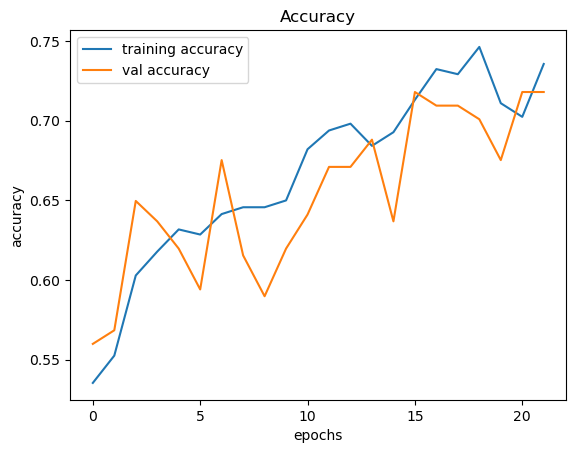

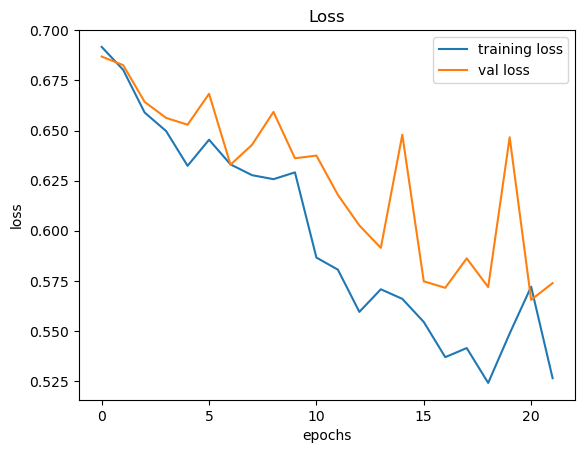

In [18]:
# Declare training parameters
epoch = 50
batch_size =32

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Train Model
history = model_tuned.fit(train_x, train_y, batch_size= batch_size, callbacks=[callback], epochs=epoch,
               validation_data= (val_x, val_y))

# Display Accuracy and Loss values of Training and Validation data

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [19]:
# Save model
model_tuned.save("CNN_new_tuned.h5")